<a href="https://colab.research.google.com/github/hanifroyyanramadhan/pembelajaran_mesin_pertemuan1/blob/main/Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from keras.preprocessing import image  
from tensorflow.keras import layers

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
IMAGE_RES = 224                                                                 
def preprocess_image_to_tensor(img_path, ax):
    img = image.load_img(img_path, target_size=(IMAGE_RES, IMAGE_RES))
    ax.imshow(img, alpha=1)
    x = image.img_to_array(img)/255.0                                           
    x = np.expand_dims(x, axis=0)                                              
    return x

In [5]:
URL = 'https://tfhub.dev/google/aiy/vision/classifier/birds_V1/1'               
bird = hub.KerasLayer(URL, input_shape=(IMAGE_RES,IMAGE_RES,3))                 
bird.trainable=False  

In [6]:
model=tf.keras.Sequential([bird])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 965)               0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
labels = pd.read_csv("/content/drive/MyDrive/Bird_Classifier_Tensorflow_Colab_Notebook-master/Bird_Classifier_Tensorflow_Colab_Notebook-master/labels_oiseaux.csv", sep=';', header=0, index_col=0)          
labels.head()

,nom,name
id,,
964,Pas d'oiseau identifié,background
0,Roselin de Cassin,Cassin's Finch
1,Courlan brun,Limpkin
2,Rupornis magnirostris,Rupornis magnirostris
3,Geai bleu,Blue Jay


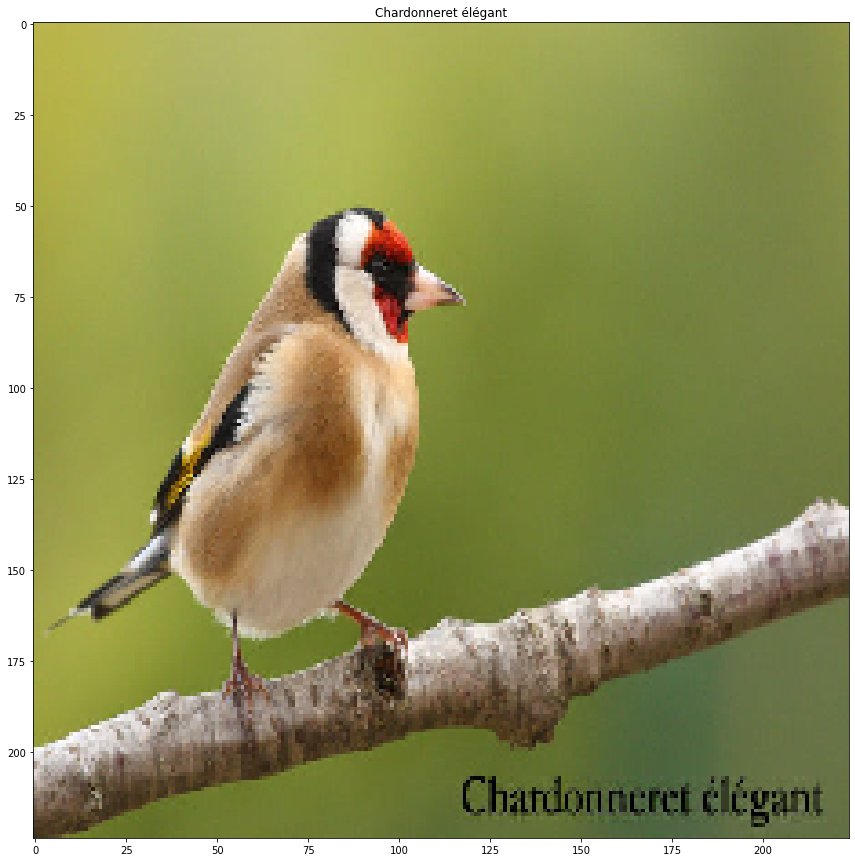

In [9]:
lang='en'                                                                      
if lang=='en':
  label='nom'
else:
  label='name'

my_files = np.array(glob("/content/drive/MyDrive/Bird_Classifier_Tensorflow_Colab_Notebook-master/Bird_Classifier_Tensorflow_Colab_Notebook-master/images/chardonneret.jpg"))  
num_img=my_files.shape[0]
lines= num_img//5 + 1
columns=np.minimum(5,num_img)
plt.figure(figsize=(30,15))
for index, file in enumerate(my_files):
  ax=plt.subplot(lines, columns,index+1)
  processed_image=preprocess_image_to_tensor(file, ax)                          
  output = model.predict(processed_image)                                       
  prediction = np.argmax(tf.squeeze(output).numpy())
  plt.title(labels[label][prediction])
plt.show()